In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('car data.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
print(df['Seller_Type'].unique())

In [ ]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())
print(df['Fuel_Type'].unique())

In [ ]:
##check missing values or null values
df.isnull().sum()

In [ ]:
df.describe()

In [ ]:
df.columns

In [ ]:
final_dataset=df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]


In [ ]:
final_dataset.head()

In [ ]:
final_dataset['Current Year']=2020

In [ ]:
final_dataset.head()

In [ ]:
final_dataset['no_year']=final_dataset['Current Year']- final_dataset['Year']

In [ ]:
final_dataset.head()

In [ ]:
final_dataset.drop(['Year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

In [ ]:
final_dataset=pd.get_dummies(final_dataset,drop_first=True)


In [ ]:
final_dataset.head()

In [ ]:
final_dataset.head()

In [ ]:
final_dataset=final_dataset.drop(['Current Year'],axis=1)


In [ ]:
final_dataset.head()

In [ ]:
final_dataset.corr()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.pairplot(final_dataset)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index 
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
final_dataset.head()

In [ ]:
##independent and dependent features
X=final_dataset.iloc[:,1:]
Y=final_dataset.iloc[:,0]

In [ ]:
X.head()

In [ ]:
Y.head()

In [ ]:
###feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,Y) 

In [ ]:
print(model.feature_importances_)

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regressor=RandomForestRegressor()

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=1)

In [ ]:
rf_random.fit(X_train,y_train)

In [105]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [106]:
rf_random.best_score_

-4.070664463296681

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

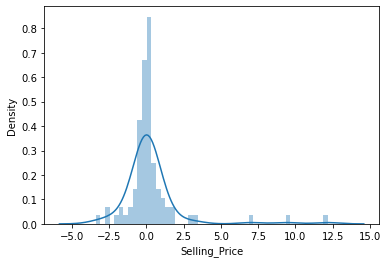

In [107]:
predictions=rf_random.predict(X_test)
sns.distplot(y_test-predictions)

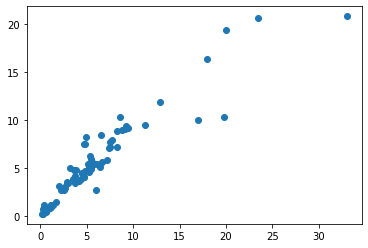

In [108]:
plt.scatter(y_test,predictions)

In [109]:
from sklearn import metrics

In [110]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8934576923076941
MSE: 4.032832800514286
RMSE: 2.008191425266597


In [111]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)